First, I have gone through my `targets.fa` file and cleaned the names of my sequences. All names contain only the letters `A-Z`, `a-z`, `0-9` and the underscore character `_`. For the sequences themselves, there are 2,700 or so from the Pfam (glycoside hydrolase family 1), about 150 from a paper that produced and purfied and tested the sequences in _E. coli_, and our lab's model BglB. 

In [5]:
! grep '>' -A1 targets.fa | head -8

>P22505_BGLB_PAEPO
MSENTFIFPATFMWGTSTSSYQIEGGTDEGGRTPSIWDTFCQIPGKVIGGDCGDVACDHF
--
>A0A0D3CKP2_BRAOL
MRAFSHLFFSFLVILFAISCSDAFTRNDFPEEFLFGAATSAYQWEGAVDEDGRTPSVWDT
--
>A0A089PP77_PLUGE
MNKLTLPKDFLWGGAVAAHQVEGGWNQGGKGPSICDVLTGGAHGVPREITQSVEAGKYYP


Now I will check to see if there are any redundant sequences in the file, and remove them if so, by combining all the names together (don't lose data!)

In [7]:
from Bio import SeqIO 

seen = []
for record in SeqIO.parse('targets.fa', 'fasta'):
    if record.seq in seen:
        print('Found sequence {} that is the same as another sequence'.format(record.id))
        continue 
    seen.append(record.seq)

Found sequence A0A022LM45_9MICO that is the same as another sequence
Found sequence R6UYP4_9FIRM that is the same as another sequence
Found sequence I1IAG4_BRADI that is the same as another sequence
Found sequence M7ZDE0_TRIUA that is the same as another sequence
Found sequence M7ZDE0_TRIUA that is the same as another sequence
Found sequence A0A0D3GK12_9ORYZ that is the same as another sequence
Found sequence A0A0D3GK12_9ORYZ that is the same as another sequence
Found sequence W0AG68_9SPHN that is the same as another sequence
Found sequence A9WDK4_CHLAA that is the same as another sequence
Found sequence L0EFG7_THECK that is the same as another sequence
Found sequence Q5YWH5_NOCFA that is the same as another sequence
Found sequence D6ZED3_SEGRD that is the same as another sequence
Found sequence H9JXC4_BOMMO that is the same as another sequence
Found sequence R2PQY2_9ENTE that is the same as another sequence
Found sequence K7L6U3_SOYBN that is the same as another sequence
Found sequenc

Found sequence R5Q547_9FIRM that is the same as another sequence
Found sequence A0A0D3EVD7_9ORYZ that is the same as another sequence
Found sequence A0A0D3EVD7_9ORYZ that is the same as another sequence
Found sequence E3IXX7_FRASU that is the same as another sequence
Found sequence E3IUF1_FRASU that is the same as another sequence
Found sequence I2F620_9BACT that is the same as another sequence
Found sequence A0A0A1G1J2_9MYCO that is the same as another sequence
Found sequence X2H7W6_9GAMM that is the same as another sequence
Found sequence D1BJI3_SANKS that is the same as another sequence
Found sequence C1A0M8_RHOE4 that is the same as another sequence
Found sequence A0A087GIU9_ARAAL that is the same as another sequence
Found sequence I1QYA3_ORYGL that is the same as another sequence
Found sequence BGL28_ORYSJ that is the same as another sequence
Found sequence K7LAN1_SOYBN that is the same as another sequence
Found sequence Q9HIL6_THEAC that is the same as another sequence
Found sequ

Found sequence SDJGI_87 that is the same as another sequence
Found sequence SDJGI_183 that is the same as another sequence
Found sequence SDJGI_30 that is the same as another sequence
Found sequence SDJGI_40 that is the same as another sequence
Found sequence SDJGI_53 that is the same as another sequence
Found sequence SDJGI_170 that is the same as another sequence
Found sequence SDJGI_52 that is the same as another sequence
Found sequence SDJGI_197 that is the same as another sequence
Found sequence SDJGI_73 that is the same as another sequence
Found sequence SDJGI_128 that is the same as another sequence
Found sequence SDJGI_151 that is the same as another sequence
Found sequence SDJGI_177 that is the same as another sequence
Found sequence SDJGI_117 that is the same as another sequence
Found sequence SDJGI_55 that is the same as another sequence
Found sequence SDJGI_112 that is the same as another sequence
Found sequence SDJGI_163 that is the same as another sequence
Found sequence 

Well, that is interesting. There is a lot of redundancy. Instead of blindly discarding, I'd like to keep the name from the JGI data set, because we have experimental data for those sequences. 

In [1]:
def longer(x, y):
    '''
    returns the longer of iterables x, y
    if they are the same length, returns y 
    '''
    if x > y:
        return x
    return y

print(longer('cat', 'dog'), longer('cat', 'mouse'))

dog mouse


In [15]:
from Bio import SeqIO 

seen = []
wanted = []
for record in SeqIO.parse('targets.fa', 'fasta'):
    # do I want you to appear in the final alignment? 
    if record.seq not in seen:
        seen.append(record.seq)
        wanted.append(record)
    else:
        # I have seen this seq
        # find the better name 
        for w in wanted:
            if w.seq == record.seq:
                # they are same sequence
                w.id = longer(w.id, record.id) 
                
len(wanted) 

2533

In [16]:
SeqIO.write(wanted, 'target.fa', 'fasta')

2533

OK, so now we have 2,533 non-redundant sequences in our FASTA file. I will now align them using Mafft via the following commmand 

```bash
mafft --auto --thread -1 target.fa > mafft_out.fa
```

(that takes <1 min on my dual core 1.3 GHz MacBook Air), and also with Muscle 

```bash
muscle -in target.fa > muscle_out.fa 
```

Tree building

For tree building, I used FastTree with the following command line 

```bash 
FastTree mafft_out.fa > mafft_tree.nwk 
```

Now, we have the unpleasant task of trying to use Graphlan. Why it is so slow and can't just be `import`ed is a mystery. 

In [37]:
for w in wanted: 
    for record in SeqIO.parse('data.fa', 'fasta'):
        if record.seq == w.seq:
            print(record.id, w.id)

bglb SDJGI_16
run_A SDJGI_142
run_B SDJGI_139
run_C SDJGI_4


Now, let's draw a tree 

In [121]:
fr.head()

,Sorting,Organism,PDB,Kindgom,Sol_exp_(mg/ml),Cellobiose_binary(Act),Cellobiose_therm_binary,pH7_40,pH4_40,pH7_60,pH7_80,pH4_80,pH7_80_pre80,pH7_90_pre90,Name,Sequence,organism,uniprot
gene,,,,,,,,,,,,,,,,,,
SDJGI_31,1,Picrophilus torridus DSM 9790,NaN,Archaea,0.010014,0.0,0.0,0.043767,0.042467,0.042100,0.040767,0.041400,0.04085,0.041333,SDJGI_31,MLPKNFLLGFSLAGFQSEMGISDPDSNSDWWLWVHDPVNIRTGLVS...,Picrophilus torridus,Q6KZ14
SDJGI_139,2,Thermoplasma volcanium GSS1,NaN,Archaea,0.399383,1.0,1.0,1.111767,1.494767,1.898033,1.949733,1.498800,2.11665,0.045933,SDJGI_139,MVENNFPEDFKFGWSQSGFQSEMGYDNAMDDKSDWYVWVHDKENIQ...,Thermoplasma volcanium,NaN
SDJGI_35,3,Magnaporthe grisea Y34,NaN,Eukaryote,0.012451,0.0,0.0,0.040667,0.040733,0.040500,0.040533,0.042033,0.04080,0.041333,SDJGI_35,MSLPKDFLWGFATASYQIEGAIDKDGRGPSIWDTFTAIPGKVADGS...,Magnaporthe grisea,NaN
SDJGI_137,4,Thermococcus kodakarensis KOD1,NaN,Archaea,0.004728,0.0,0.0,0.041167,0.041233,0.040867,0.041000,0.042533,0.04190,0.042100,SDJGI_137,MREFAWGVVQSAFQFEMGDPLRRFIDTRTDWWHWVRDPLNIKNDLV...,Thermococcus kodakarensis,Q5JDV2
SDJGI_42,5,Saccharophagus degradans 2-40,NaN,Bacteria,0.281507,1.0,0.0,1.795000,0.701667,1.006167,1.276900,0.511700,0.04050,0.041500,SDJGI_42,MNRLTLPPSSRLRSKEFTFGVATSSYQIEGGIDSRLPCNWDTFCEQ...,Saccharophagus degradans,Q21KX3


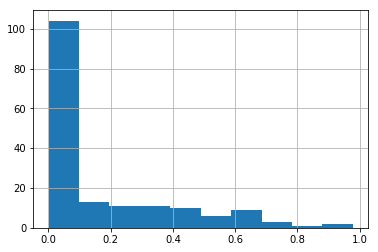

In [122]:
fr['Sol_exp_(mg/ml)'].hist()

In [141]:
# add in previusly-repirted data from JGI paper 

import pandas 

fr = pandas.read_csv('../data_sets/freezer_annotated.csv', index_col=0) 

color_map = {
    'Bacteria': '#51A7F9', # blue 
    'Eukaryote': '#70BF41', # green 
    'Archaea': '#EC5D57'} # red 

def shape_map(value):
    if value < 0.1:
        # did not express
        return 'd'
    return 'o'

collect = []
for idx, row in fr.iterrows():
    collect.append('{}\t{}\t{}\n'.format(idx, 'clade_marker_size', '20'))
    collect.append('{}\t{}\t{}\n'.format(idx, 'clade_marker_color', color_map[row.Kindgom]))
    collect.append('{}\t{}\t{}\n'.format(idx, 'clade_marker_shape', shape_map(row['Sol_exp_(mg/ml)']))) 

with open('annot.txt', 'w') as fn:
    fn.write(''.join(collect))

In [142]:
! wc -l annot.txt

     525 annot.txt


In [143]:
! tail annot.txt

SDJGI_57	clade_marker_shape	d
SDJGI_184	clade_marker_size	20
SDJGI_184	clade_marker_color	#51A7F9
SDJGI_184	clade_marker_shape	o
SDJGI_72	clade_marker_size	20
SDJGI_72	clade_marker_color	#EC5D57
SDJGI_72	clade_marker_shape	o
SDJGI_116	clade_marker_size	20
SDJGI_116	clade_marker_color	#51A7F9
SDJGI_116	clade_marker_shape	o


In [147]:
custom_annot = '''
clade_marker_size	0
clade_separation	0.3

SDJGI_142	clade_marker_size	100
SDJGI_142	clade_marker_color	yellow
SDJGI_139	clade_marker_size	100
SDJGI_139	clade_marker_color	yellow
SDJGI_4	clade_marker_size	100
SDJGI_4	clade_marker_color	yellow
SDJGI_16_P22505_BGLB_PAEPO	clade_marker_size	500
SDJGI_16_P22505_BGLB_PAEPO	clade_marker_color	yellow

'''

with open('annot.txt', 'a') as fn:
    fn.write(custom_annot)
    
! wc -l annot.txt

     551 annot.txt


In [148]:
%%bash 

# create XML file 

export python=/Users/alex/anaconda3/envs/snakes/bin/python 
$python ../trees/graphlan/graphlan_annotate.py --annot annot.txt mafft_tree.nwk mafft_graphlan.xml  

In [ ]:
%%bash 

# create XML file 

export python=/Users/alex/anaconda3/envs/snakes/bin/python 
$python graphlan.py --external_legends --pad 0 --dpi 200 mafft_graphlan.xml output_img.png
open output_img.png